In [58]:
# coding=gbk
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack

x,y=load_svmlight_file("C:/Users/Bean/Desktop/机器学习实验课/housing_scale.txt")
from sklearn.model_selection import train_test_split
train_x,cv_x,train_y,cv_y=train_test_split(x,y,test_size=0.2,random_state=0)

def GradientDescent(x, y, theta=None, alpha=0.001, num_iter=12000):
    x0 = np.ones((len(y), 1))
    x = hstack([x0, x])
    if theta == None:
        theta= np.zeros(x.shape[1])
    train_loss=[0]*num_iter
    m=len(y)
    for i in range(num_iter):
        h = x.dot(theta)
        loss = h - y
        gradient = x.T.dot(loss)/m
        theta = theta - alpha * gradient
        
        loss=np.sum((x.dot(theta) - y) ** 2) / (2 * m)
        train_loss[i]=loss
    return theta,train_loss

update_theta,train_loss=GradientDescent(train_x, train_y)
print(update_theta)
print(train_loss[-1])
a,cv_loss=GradientDescent(cv_x,cv_y)

[ 8.05741654 -7.02698449  0.33900556 -2.36785247  0.64162334 -2.5890484
  7.05091752  0.25377609 -5.336889    1.7642797  -0.6304105  -5.05136164
  2.93034849 -8.86371521]
10.6473353545


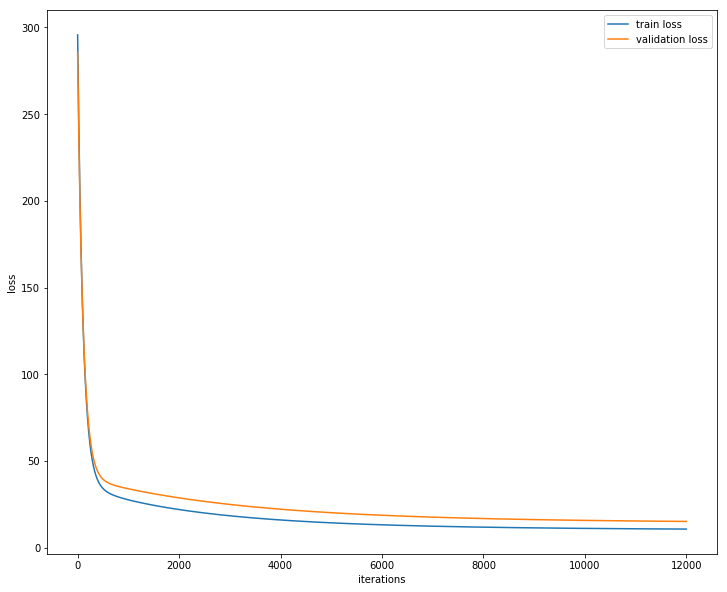

In [59]:
import matplotlib.pyplot as plt
plt.figure('loss', figsize=(12, 10))
plt.plot(train_loss, label='train loss')
plt.plot(cv_loss, label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()